In [2]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta

# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')
import re


In [3]:
train = pd.read_csv("train_1.csv")


In [3]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
train.head() 

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
def get_language(page): 
    res = re.search('[a-z][a-z].wikipedia.org',page) 
    if res: 
        return res.group(0)[0:2] 
    return 'na'

In [8]:
train['Page']

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

In [11]:
train['lang'] = train.Page.map(get_language)


In [13]:
train.shape

(145063, 552)

In [12]:
## splitting each language for each of the row 
train['lang']

0         zh
1         zh
2         zh
3         zh
4         zh
          ..
145058    es
145059    es
145060    es
145061    es
145062    es
Name: lang, Length: 145063, dtype: object

In [14]:
## counting the occurance of languages 
from collections import Counter

print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [16]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

In [17]:
lang_sets['de'][:10]


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
46371,10_Cloverfield_Lane_de.wikipedia.org_all-acces...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,3.0,6.0,3.0,5.0,4.0,3.0,6.0,3.0
46372,11._November_de.wikipedia.org_all-access_spider,9.0,30.0,14.0,7.0,12.0,8.0,6.0,5.0,12.0,...,15.0,7.0,15.0,13.0,18.0,13.0,13.0,14.0,13.0,13.0
46373,12_Monkeys_de.wikipedia.org_all-access_spider,1.0,19.0,2.0,6.0,6.0,4.0,1.0,4.0,5.0,...,12.0,7.0,8.0,5.0,2.0,7.0,3.0,5.0,6.0,8.0
46374,187_Strassenbande_de.wikipedia.org_all-access_...,0.0,1.0,2.0,5.0,1.0,1.0,0.0,2.0,6.0,...,10.0,34.0,19.0,16.0,19.0,12.0,41.0,15.0,13.0,18.0
46375,1944_(Lied)_de.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,8.0,7.0,0.0,3.0,6.0,0.0,1.0,4.0
46376,1984_(Roman)_de.wikipedia.org_all-access_spider,7.0,9.0,11.0,18.0,9.0,18.0,6.0,5.0,8.0,...,25.0,62.0,42.0,18.0,11.0,28.0,23.0,33.0,38.0,31.0
46377,24-Stunden-Rennen_von_Le_Mans_de.wikipedia.org...,2.0,7.0,13.0,7.0,12.0,3.0,6.0,11.0,11.0,...,8.0,7.0,7.0,11.0,7.0,11.0,8.0,12.0,8.0,11.0
46378,257ers_de.wikipedia.org_all-access_spider,6.0,5.0,20.0,5.0,5.0,6.0,5.0,6.0,4.0,...,7.0,9.0,12.0,7.0,7.0,2.0,11.0,4.0,3.0,8.0
46379,2_Broke_Girls_de.wikipedia.org_all-access_spider,9.0,9.0,9.0,9.0,3.0,10.0,9.0,21.0,6.0,...,12.0,5.0,12.0,9.0,2.0,7.0,3.0,5.0,7.0,8.0
46380,3_Days_to_Kill_de.wikipedia.org_all-access_spider,1.0,2.0,2.0,1.0,1.0,5.0,3.0,2.0,4.0,...,3.0,3.0,5.0,1.0,0.0,5.0,4.0,1.0,1.0,3.0


In [18]:
# calculate sum of all views everyday for each language 
sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [19]:
sums['de'][:10]


2015-07-01    714.968405
2015-07-02    705.229741
2015-07-03    676.877231
2015-07-04    621.145145
2015-07-05    722.076185
2015-07-06    794.832480
2015-07-07    770.814256
2015-07-08    782.077641
2015-07-09    752.939990
2015-07-10    701.702593
dtype: float64

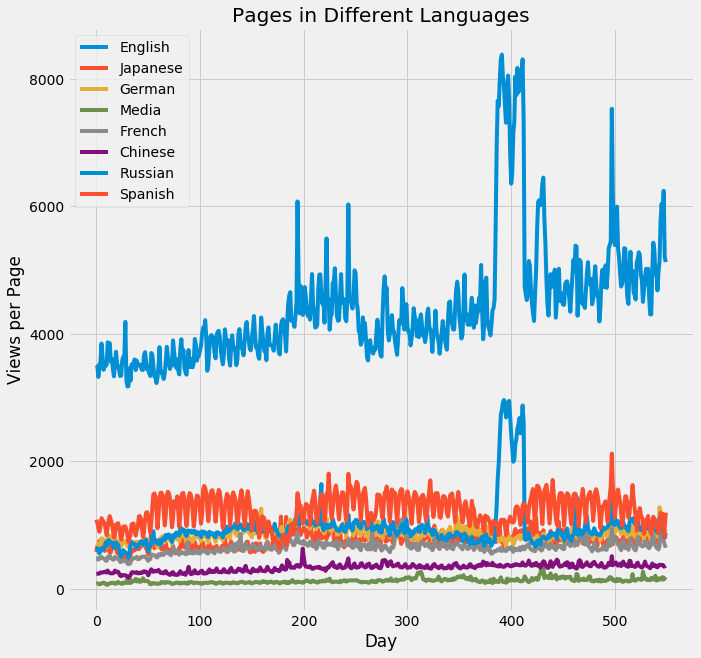

In [20]:
# Same number of days
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

In [28]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')


In [29]:
train_flattened.head()

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-13,8
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-13,11
2,3C_zh.wikipedia.org_all-access_spider,2016-11-13,4
3,4minute_zh.wikipedia.org_all-access_spider,2016-11-13,13
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-13,11


In [32]:
train_flattened.tail()

,Page,date,Visits
7253145,Underworld_(serie_de_películas)_es.wikipedia.o...,lang,es
7253146,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,lang,es
7253147,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,lang,es
7253148,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,lang,es
7253149,Francisco_el_matemático_(serie_de_televisión_d...,lang,es


In [31]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits') 
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

ValueError: ('Unknown string format:', 'lang')

In [4]:
## second part 
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')  

In [5]:
train_flattened.head()


,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-12,13.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-12,12.0
2,3C_zh.wikipedia.org_all-access_spider,2016-11-12,6.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-11-12,38.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-12,13.0


In [6]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')

In [7]:
# converting date to datetime 
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]') 


In [8]:
# date turned to number of week days 
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)


In [11]:
train_flattened.tail() 



,Page,date,Visits,weekend
7253145,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0,1.0
7253146,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,NaN,1.0
7253147,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,NaN,1.0
7253148,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,NaN,1.0
7253149,Francisco_el_matemático_(serie_de_televisión_d...,2016-12-31,NaN,1.0


In [12]:
# Median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

# Merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [13]:
train_flattened.head()


,date,Visits,weekend,mean,median
Page,,,,,
!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,0.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,0.0,2.836735,2.0


In [14]:
train_flattened.reset_index(drop=False,inplace=True)


In [15]:
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())


In [16]:
train_flattened.head()



,Page,date,Visits,weekend,mean,median,weekday
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0,5
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0,6
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0,0
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,0.0,2.836735,2.0,1
4,!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,0.0,2.836735,2.0,2


In [17]:
# Feature engineering with the date
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
# rememeber day gives us the day of that month 
train_flattened['day']=train_flattened.date.dt.day

In [18]:
train_flattened.head()



,Page,date,Visits,weekend,mean,median,weekday,year,month,day
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0,5,2016,11,12
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0,6,2016,11,13
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0,0,2016,11,14
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,0.0,2.836735,2.0,1,2016,11,15
4,!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,0.0,2.836735,2.0,2,2016,11,16


In [19]:
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()


In [20]:
mean_group

date
2016-11-12    1536.471757
2016-11-13    1679.630589
2016-11-14    1701.941831
2016-11-15    1564.172228
2016-11-16    1520.673959
2016-11-17    1463.751937
2016-11-18    1396.544145
2016-11-19    1399.170412
2016-11-20    1482.018739
2016-11-21    1529.844585
2016-11-22    1526.723944
2016-11-23    1444.043898
2016-11-24    1373.814638
2016-11-25    1326.709107
2016-11-26    1472.107224
2016-11-27    1583.903133
2016-11-28    1460.719082
2016-11-29    1533.142157
2016-11-30    1400.355717
2016-12-01    1389.007191
2016-12-02    1349.266773
2016-12-03    1440.036531
2016-12-04    1525.511597
2016-12-05    1513.758528
2016-12-06    1495.341920
2016-12-07    1444.830664
2016-12-08    1416.289162
2016-12-09    1369.501143
2016-12-10    1360.451215
2016-12-11    1439.703425
2016-12-12    1457.877654
2016-12-13    1393.217357
2016-12-14    1456.495662
2016-12-15    1338.356251
2016-12-16    1265.571850
2016-12-17    1280.523597
2016-12-18    1474.682207
2016-12-19    1561.789931
2016-12

In [21]:
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True) 

In [22]:
train_flattened.head()


,Page,date,Visits,weekend,mean,median,weekday,year,month,day,month_num,weekday_num
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0,06 - Saturday,2016,11,12,11,5
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0,07 - Sunday,2016,11,13,11,6
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0,01 - Monday,2016,11,14,11,0
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,0.0,2.836735,2.0,02 - Tuesday,2016,11,15,11,1
4,!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,0.0,2.836735,2.0,03 - Wednesday,2016,11,16,11,2


In [23]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

In [24]:
train_group

month,11,12
weekday,,
01 - Monday,1564.058295,1553.219910
02 - Tuesday,1541.318249,1517.166439
03 - Wednesday,1454.986458,1488.305696
04 - Thursday,1418.773382,1444.474767
05 - Friday,1361.625633,1365.955630
06 - Saturday,1469.242102,1390.486246
07 - Sunday,1581.814364,1490.858833


In [25]:
train_group


month,11,12
weekday,,
01 - Monday,1564.058295,1553.219910
02 - Tuesday,1541.318249,1517.166439
03 - Wednesday,1454.986458,1488.305696
04 - Thursday,1418.773382,1444.474767
05 - Friday,1361.625633,1365.955630
06 - Saturday,1469.242102,1390.486246
07 - Sunday,1581.814364,1490.858833


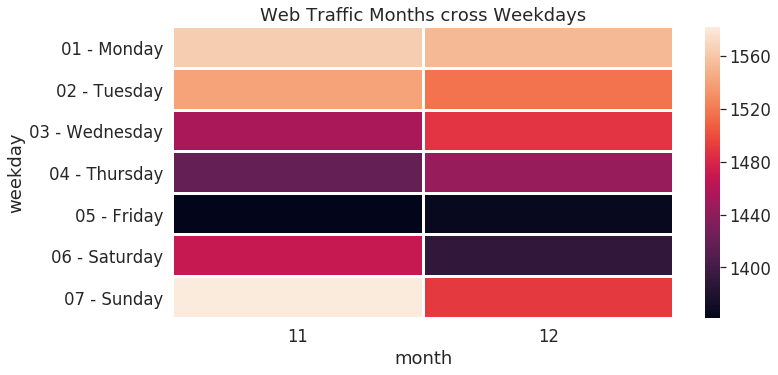

In [26]:
sns.set(font_scale=1.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross Weekdays')
plt.show()

In [27]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)

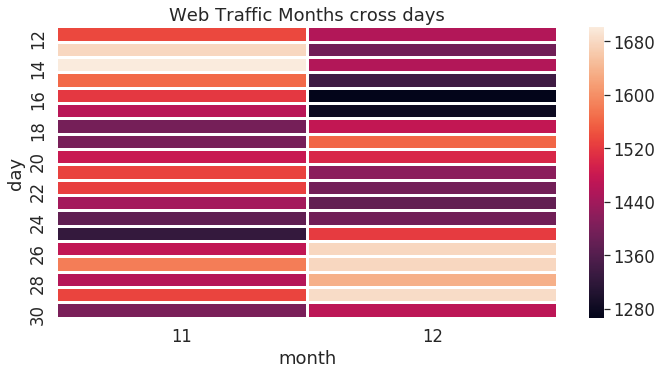

In [28]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(train_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days')
plt.show()